In [1]:
# Implement Linear Regression and calculate sum of residual error on the following Datasets.
#x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
#Compute the regression coefficients using analytic formulation and calculate Sum
#Squared Error (SSE) and R^2 value.


import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
x_mean = np.mean(x)
y_mean = np.mean(y)
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean
y_pred = m * x + b
SSE = np.sum((y - y_pred)**2)
SS_total = np.sum((y - y_mean)**2)
R_squared = 1 - (SSE / SS_total)
print("Slope (m):", m)
print("Intercept (b):", b)
print("Sum Squared Error (SSE):", SSE)
print("R squared:", R_squared)

Slope (m): 1.1696969696969697
Intercept (b): 1.2363636363636363
Sum Squared Error (SSE): 5.624242424242423
R squared: 0.952538038613988


In [2]:
#Implement gradient descent (both Full-batch and Stochastic with stopping criteria) on Least Mean Square loss formulation to compute the coefficients of
#regression matrix and compare the results using performance measures such as R 2
#SSE etc.

#full batch

def full_batch_gradient_descent(x, y, alpha=0.001, max_iter=1000, tol=1e-6):
    m = 0
    b = 0
    n = len(x)
    for i in range(max_iter):
        y_pred = m * x + b
        dm = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        m -= alpha * dm
        b -= alpha * db
        SSE = np.sum((y - y_pred)**2)
        if np.abs(SSE) < tol:
            break
    return m, b, SSE
m_full, b_full, SSE_full = full_batch_gradient_descent(x, y)
y_pred_full = m_full * x + b_full
R_squared_full = 1 - (SSE_full / SS_total)
print("Full-Batch Gradient Descent")
print("Slope (m):", m_full)
print("Intercept (b):", b_full)
print("Sum Squared Error (SSE):", SSE_full)
print("R squared:", R_squared_full)

Full-Batch Gradient Descent
Slope (m): 1.262502787535618
Intercept (b): 0.6544167888202638
Sum Squared Error (SSE): 6.605929584912748
R squared: 0.9442537587771076


In [3]:
# stochastic 

def gradient_descent_stochastic(x, y, learning_rate=0.01, epochs=1000, tol=1e-6):
    n = len(x)
    beta_0 = 0
    beta_1 = 0
    prev_loss = float('inf')
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for i in range(n):
            y_pred = beta_0 + beta_1 * x_shuffled[i]
            loss = (y_pred - y_shuffled[i]) ** 2
            grad_beta_0 = 2 * (y_pred - y_shuffled[i])
            grad_beta_1 = 2 * x_shuffled[i] * (y_pred - y_shuffled[i])
            beta_0 -= learning_rate * grad_beta_0
            beta_1 -= learning_rate * grad_beta_1
        y_pred = beta_0 + beta_1 * x
        total_loss = np.mean((y_pred - y) ** 2)
        if abs(prev_loss - total_loss) < tol:
            break
        prev_loss = total_loss
    return beta_0, beta_1
beta_0_stochastic, beta_1_stochastic = gradient_descent_stochastic(x, y)
print("\nStochastic Gradient Descent Solution")
print("Regression Coefficients:")
print("beta_0:",beta_0_stochastic)
print("beta_1:",beta_1_stochastic)


Stochastic Gradient Descent Solution
Regression Coefficients:
beta_0: 1.1865207166179466
beta_1: 1.1798825432033184


## Housing Data Set

In [4]:
# Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that
# best follow the linear relationship with the output price. Implement both the analytic formulation 
# and gradient descent (Full-batch, stochastic) on LMS loss formulation to compute the coefficients 
# of regression matrix and compare the results.
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
housing = pd.DataFrame(housing.data, columns=housing.feature_names)
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
X = housing.iloc[:,:-1]
y = housing.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [9]:
y_pred = regression_pipeline.predict(X_test)
r2_score( y_test, y_pred)

0.892626162310851

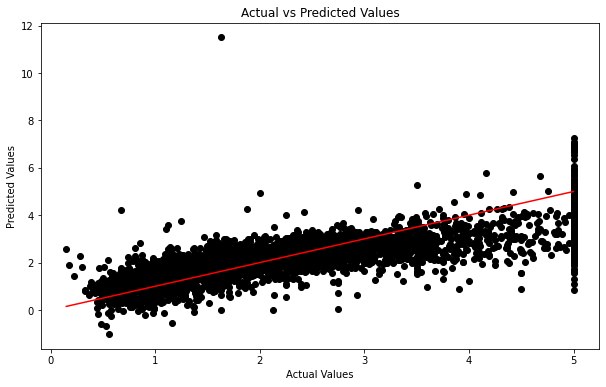

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

california_housing = fetch_california_housing()

X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='Black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def full_batch_gradient_descent_scaled(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    theta = np.random.randn(n_features) 
    for _ in range(n_iterations):
        gradients = -2/n_samples * X.T.dot(y - X.dot(theta))
        theta -= learning_rate * gradients
    return theta

def stochastic_gradient_descent_scaled(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    theta = np.random.randn(n_features)  
    for _ in range(n_iterations):
        random_index = np.random.randint(n_samples)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2 * xi.T.dot(yi - xi.dot(theta))
        theta -= learning_rate * gradients
    return theta

theta_full_batch_scaled = full_batch_gradient_descent_scaled(X_train_scaled, y_train)
theta_stochastic_scaled = stochastic_gradient_descent_scaled(X_train_scaled, y_train)
y_pred_full_batch_scaled = X_test_scaled.dot(theta_full_batch_scaled)
y_pred_stochastic_scaled = X_test_scaled.dot(theta_stochastic_scaled)

mse_full_batch_scaled = mean_squared_error(y_test, y_pred_full_batch_scaled)
mse_stochastic_scaled = mean_squared_error(y_test, y_pred_stochastic_scaled)

print("Mean Squared Error (Full-Batch Gradient Descent with Scaling):", mse_full_batch_scaled)
print("Mean Squared Error (Stochastic Gradient Descent with Scaling):", mse_stochastic_scaled)

Mean Squared Error (Full-Batch Gradient Descent with Scaling): 4.871700716846998
Mean Squared Error (Stochastic Gradient Descent with Scaling): 129.73528841533292
